In [ ]:
cd /content/drive/MyDrive/Face shape

/content/drive/MyDrive/Face shape


In [ ]:
import os
import glob
import h5py
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import numpy as np

In [ ]:

batch_size = 16  #was 16
train_images = 'FaceShape Dataset/training_set'
test_images = 'FaceShape Dataset/testing_set'

TrainDatagen = ImageDataGenerator(
        preprocessing_function= preprocess_input,
        horizontal_flip = True

)

TestDatagen = ImageDataGenerator(
    preprocessing_function= preprocess_input

)

train_data = TrainDatagen.flow_from_directory(
    train_images,
    target_size = (224,224),
    batch_size =batch_size,
    class_mode = 'categorical'

)

test_data = TestDatagen.flow_from_directory(
    test_images,
    target_size = (224,224),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [ ]:
next(train_data)[0][0]

In [ ]:
test_data.class_indices

{'Heart': 0, 'Oblong': 1, 'Oval': 2, 'Round': 3, 'Square': 4}

In [ ]:
# def build_model():
#     input_img = Input(shape=(224,224,3), name='ImageInput')
#     x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
#     x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
#     x = MaxPooling2D((2,2), name='pool1')(x)
    
#     x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
#     x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
#     x = MaxPooling2D((2,2), name='pool2')(x)
    
#     x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
#     x = BatchNormalization(name='bn1')(x)
#     x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
#     x = BatchNormalization(name='bn2')(x)
#     x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3')(x)
#     x = MaxPooling2D((2,2), name='pool3')(x)
    
#     x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1')(x)
#     x = BatchNormalization(name='bn3')(x)
#     x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2')(x)
#     x = BatchNormalization(name='bn4')(x)
#     x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3')(x)
#     x = MaxPooling2D((2,2), name='pool4')(x)
    
#     x = Flatten(name='flatten')(x)
#     x = Dense(1024, activation='relu', name='fc1')(x)
#     x = Dropout(0.7, name='dropout1')(x)
#     x = Dense(512, activation='relu', name='fc2')(x)
#     x = Dropout(0.5, name='dropout2')(x)
#     x = Dense(5, activation='softmax', name='fc3')(x)
    
#     model = Model(inputs=input_img, outputs=x)
#     return model

In [ ]:
def build_model():
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling2D((2,2), name='pool1')(x)
    
    x = Conv2D(128, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)

    x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    
    x = Flatten(name='flatten')(x)
    # x = Dense(1024, activation='relu', name='fc1')(x)
    x = Dense(5, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [ ]:
# def build_model():
#     input_img = Input(shape=(224,224,3), name='ImageInput')

#     pretrainmodel = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=(224,224,3))
#     x = pretrainmodel(input_img)
#     x = Flatten()(x)
#     x = Dense(5, activation='softmax')(x)
#     model = Model(inputs=input_img, outputs=x)
#     return model

In [ ]:
model =  build_model()
model.summary()

In [ ]:
# opt = RMSprop(lr=0.0001, decay=1e-6)
opt = Adam(lr=0.0001, decay=1e-5)
es = EarlyStopping(patience=5,min_delta= .05, monitor="val_acc")
chkpt = ModelCheckpoint(filepath='ckpt/best_model_todate', save_best_only=True, save_weights_only=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Fit the model
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit_generator(
    train_data,              
    steps_per_epoch = train_data.samples//batch_size,
    validation_data = test_data,
    validation_steps = test_data.samples//batch_size,
    epochs = 50,
    callbacks=[es,chkpt]
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
250/250 [==============================] - 1063s 4s/step - loss: 2.3492 - accuracy: 0.4302 - val_loss: 2.1219 - val_accuracy: 0.4597
Epoch 2/50
250/250 [==============================] - 126s 504ms/step - loss: 0.7975 - accuracy: 0.7427 - val_loss: 1.4199 - val_accuracy: 0.5625
Epoch 3/50
250/250 [==============================] - 125s 499ms/step - loss: 0.3801 - accuracy: 0.8687 - val_loss: 1.6855 - val_accuracy: 0.5413
Epoch 4/50
250/250 [==============================] - 123s 492ms/step - loss: 0.2065 - accuracy: 0.9352 - val_loss: 1.8608 - val_accuracy: 0.5766
Epoch 5/50
250/250 [==============================] - 124s 497ms/step - loss: 0.1591 - accuracy: 0.9477 - val_loss: 1.7520 - val_accuracy: 0.5958
Epoch 6/50
250/250 [==============================] - 123s 491ms/step - loss: 0.1256 - accuracy: 0.9605 - val_loss: 1.8329 - val_accuracy: 0.5867
Epoch 7/50
250/250 [==============================] - 123s 494ms/step - loss: 0.1005 - accuracy: 0.9695 - val_loss: 1.7924 - v

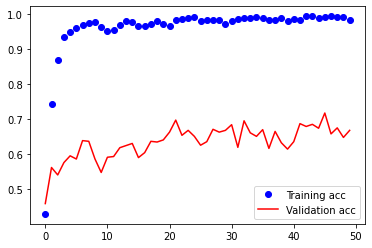

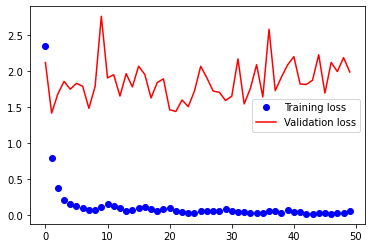

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt


epochs = range(len(acc))
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend()


plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')

plt.legend()
plt.show()

In [ ]:
# model.save('face_classifier.h5')

In [ ]:
# model.save_weights('faceshape_weights')

In [ ]:
model.load_weights('ckpt/best_model_todate')# Re-evaluate the model
loss,acc = model.evaluate(test_data)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

63/63 [==============================] - 20s 319ms/step - loss: 1.4223 - accuracy: 0.5610
Restored model, accuracy: 56.10%


In [ ]:
test = None
y_test = None
for x, y in test_data:
  test = x
  y_test = y
  break

In [ ]:
pred = model.predict(test)

In [ ]:
np.argmax(pred, axis=1), np.argmax(y_test, axis=1)

(array([1, 3, 2, 4, 4, 0, 1, 1, 4, 2, 1, 3, 4, 1, 3, 3]),
 array([1, 3, 2, 3, 4, 0, 1, 1, 4, 4, 3, 3, 4, 3, 3, 3]))

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 3.2 MB/s 


In [ ]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Face shape/model')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
